### Dependencias

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from scikitplot.metrics import plot_roc

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,VarianceThreshold

from functools import reduce

from scipy import stats
from varclushi import VarClusHi

from sklearn.metrics import confusion_matrix

import warnings
import os
warnings.filterwarnings('ignore')
cf.go_offline()
pd.set_option('display.max_columns', None)

In [3]:
ruta = '/home/guadalupe/analisis/Datos/pure_ml'

In [4]:
# DIividimos los datos en train, valid y test
train = pd.read_csv(os.path.join(ruta,'train.csv'))
valid = pd.read_csv(os.path.join(ruta,'valid.csv'))
test = pd.read_csv(os.path.join(ruta,'test.csv'))
train.shape, valid.shape, test.shape

((9294, 55), (3984, 55), (3615, 54))

In [5]:
train.head()

,ID,C_01,C_02,C_03,C_04,C_05,C_06,C_07,C_08,C_09,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18,C_19,C_20,C_21,C_22,C_23,C_24,C_25,C_26,C_27,C_28,C_29,C_30,C_31,C_32,C_33,C_34,C_35,C_36,C_37,C_38,C_39,C_40,C_41,C_42,C_43,C_44,C_45,C_46,C_47,C_48,C_49,C_50,C_51,C_52,D_1,TARGET
0,674,41.902848,-87.643360,41.901540,-87.648066,41.901002,-87.642246,41.901952,-87.649264,41.900381,-87.640758,41.901420,-87.648647,41.899206,-87.640574,41.900519,-87.647377,279.80,253.0,636.521739,17.20,0.496596,12.512055,0.076062,0.458498,0.003953,592.67,524.0,637.442748,18.300,0.503412,12.815210,0.079497,0.446565,0.007634,985.08,803.0,613.524284,17.633333,0.464201,12.550535,0.089379,0.405978,0.011208,1416.46,1114,607.755835,18.2125,0.442469,12.577837,0.089440,0.385996,0.013465,cat11,0.0
1,7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.60,261.0,964.137931,492.35,0.373754,15.684291,0.079347,0.160920,0.287356,790.93,493.0,862.393509,484.900,0.393171,16.119533,0.076833,0.194726,0.253550,1095.13,724.0,819.861878,489.266667,0.425767,16.177320,0.069578,0.185083,0.256906,1504.42,981,800.978593,514.1375,0.429966,16.390591,0.069741,0.174312,0.260958,cat01,0.0
2,11558,41.891421,-87.641041,41.897380,-87.651233,41.892190,-87.645894,41.898590,-87.651771,41.892631,-87.648701,41.897750,-87.653771,41.892080,-87.645706,41.896929,-87.651889,217.58,124.0,690.000000,167.55,0.282902,12.970403,0.107815,0.048387,0.032258,498.69,296.0,710.067568,218.375,0.304845,13.783581,0.098429,0.104730,0.013514,839.38,517.0,704.448743,242.733333,0.326990,13.455764,0.097792,0.104449,0.025145,1065.77,706,699.008499,231.2625,0.357551,12.856969,0.094956,0.100567,0.055241,cat01,0.0
3,463,41.894619,-87.664955,41.896899,-87.657375,41.899288,-87.667246,41.897670,-87.658840,41.900640,-87.669530,41.897434,-87.656594,41.898954,-87.664110,41.897445,-87.654437,276.03,190.0,653.368421,302.00,0.316370,15.971474,0.078138,0.100000,0.147368,656.13,426.0,667.464789,367.425,0.331766,16.020376,0.086355,0.230047,0.159624,1017.63,668.0,656.047904,392.600000,0.323264,15.576991,0.086988,0.248503,0.184132,1385.09,947,633.389652,391.8000,0.334950,14.844393,0.087593,0.271383,0.155227,cat04,0.0
4,2409,41.896174,-87.649482,41.896501,-87.647639,41.895677,-87.646345,41.896954,-87.644895,41.896052,-87.648565,41.897583,-87.646286,41.895577,-87.648082,41.898037,-87.646595,257.86,236.0,706.779661,277.75,0.476129,12.612754,0.076502,0.144068,0.059322,548.68,482.0,718.128898,145.650,0.460132,12.402863,0.081410,0.161826,0.045643,814.62,697.0,715.000000,102.666667,0.451432,12.958924,0.077184,0.164993,0.034433,1067.92,917,714.956332,80.7750,0.454336,12.954656,0.077860,0.149400,0.030534,cat07,0.0


### Categorización de las variables

In [6]:
varc = [v for v in train.columns if v[:2]=='C_']
vart = ['TARGET']
um = ['ID']

### Análisis exploratorio de datos

#### Ausentes

In [7]:
# Sacamos la propocion de valores nulos para cada variable ordenadas de mayor a menor
miss = pd.Series(train[varc].isnull().sum()/len(train)).sort_values(ascending=False).to_frame()
miss.head(5)

,0
C_03,0.400689
C_04,0.400689
C_01,0.398321
C_02,0.398321
C_07,0.372714


In [8]:
# Renombramos la columna
miss.columns = ['miss']
# Tomamos las variables que tienen mas del 30% de valores nulos
fuera = list(miss[miss['miss']>0.3].index)
# Sacamos las variables que tienen mas del 30% de valores nulos
varc = [v for v in varc if v not in fuera]
# Eliminamos todas las variables que tienen mas del 30% de valores nulos
train = train.drop(fuera, axis=1)
train.head()

,ID,C_17,C_18,C_19,C_20,C_22,C_23,C_24,C_25,C_26,C_27,C_28,C_29,C_31,C_32,C_33,C_34,C_35,C_36,C_37,C_38,C_39,C_40,C_41,C_42,C_43,C_44,C_45,C_46,C_47,C_48,C_49,C_50,C_51,C_52,D_1,TARGET
0,674,279.80,253.0,636.521739,17.20,12.512055,0.076062,0.458498,0.003953,592.67,524.0,637.442748,18.300,12.815210,0.079497,0.446565,0.007634,985.08,803.0,613.524284,17.633333,0.464201,12.550535,0.089379,0.405978,0.011208,1416.46,1114,607.755835,18.2125,0.442469,12.577837,0.089440,0.385996,0.013465,cat11,0.0
1,7397,424.60,261.0,964.137931,492.35,15.684291,0.079347,0.160920,0.287356,790.93,493.0,862.393509,484.900,16.119533,0.076833,0.194726,0.253550,1095.13,724.0,819.861878,489.266667,0.425767,16.177320,0.069578,0.185083,0.256906,1504.42,981,800.978593,514.1375,0.429966,16.390591,0.069741,0.174312,0.260958,cat01,0.0
2,11558,217.58,124.0,690.000000,167.55,12.970403,0.107815,0.048387,0.032258,498.69,296.0,710.067568,218.375,13.783581,0.098429,0.104730,0.013514,839.38,517.0,704.448743,242.733333,0.326990,13.455764,0.097792,0.104449,0.025145,1065.77,706,699.008499,231.2625,0.357551,12.856969,0.094956,0.100567,0.055241,cat01,0.0
3,463,276.03,190.0,653.368421,302.00,15.971474,0.078138,0.100000,0.147368,656.13,426.0,667.464789,367.425,16.020376,0.086355,0.230047,0.159624,1017.63,668.0,656.047904,392.600000,0.323264,15.576991,0.086988,0.248503,0.184132,1385.09,947,633.389652,391.8000,0.334950,14.844393,0.087593,0.271383,0.155227,cat04,0.0
4,2409,257.86,236.0,706.779661,277.75,12.612754,0.076502,0.144068,0.059322,548.68,482.0,718.128898,145.650,12.402863,0.081410,0.161826,0.045643,814.62,697.0,715.000000,102.666667,0.451432,12.958924,0.077184,0.164993,0.034433,1067.92,917,714.956332,80.7750,0.454336,12.954656,0.077860,0.149400,0.030534,cat07,0.0


* La función SimpleImputer de sklearn permite reemplazar los valores ausentes por la media, mediana o moda de la columna. En este caso, se reemplazan los valores ausentes por la mediana de la columna.

In [9]:
# Creamos el objeto para reemplazar
im = SimpleImputer(strategy='median')
# Ajustamos el objeto
im.fit(train[varc])

# Creamos el DataFrame con nuestra Xi's y le aplicamos la transformacion (imputar con la mediana)
Xi = pd.DataFrame(im.transform(train[varc]), columns=varc)
# Creamos el DataFrame de validación y le aplicamos la transformacion (imputar con la mediana)
Xv = pd.DataFrame(im.transform(valid[varc]), columns=varc)

# La unidad muestral del nuevo DataFrame sera la misma que la del original
Xi[um] = train[um]
# Lo mismo para la target, será la misma
Xi[vart] = train[vart]
Xi.head()

,C_17,C_18,C_19,C_20,C_22,C_23,C_24,C_25,C_26,C_27,C_28,C_29,C_31,C_32,C_33,C_34,C_35,C_36,C_37,C_38,C_39,C_40,C_41,C_42,C_43,C_44,C_45,C_46,C_47,C_48,C_49,C_50,C_51,C_52,ID,TARGET
0,279.80,253.0,636.521739,17.20,12.512055,0.076062,0.458498,0.003953,592.67,524.0,637.442748,18.300,12.815210,0.079497,0.446565,0.007634,985.08,803.0,613.524284,17.633333,0.464201,12.550535,0.089379,0.405978,0.011208,1416.46,1114.0,607.755835,18.2125,0.442469,12.577837,0.089440,0.385996,0.013465,674,0.0
1,424.60,261.0,964.137931,492.35,15.684291,0.079347,0.160920,0.287356,790.93,493.0,862.393509,484.900,16.119533,0.076833,0.194726,0.253550,1095.13,724.0,819.861878,489.266667,0.425767,16.177320,0.069578,0.185083,0.256906,1504.42,981.0,800.978593,514.1375,0.429966,16.390591,0.069741,0.174312,0.260958,7397,0.0
2,217.58,124.0,690.000000,167.55,12.970403,0.107815,0.048387,0.032258,498.69,296.0,710.067568,218.375,13.783581,0.098429,0.104730,0.013514,839.38,517.0,704.448743,242.733333,0.326990,13.455764,0.097792,0.104449,0.025145,1065.77,706.0,699.008499,231.2625,0.357551,12.856969,0.094956,0.100567,0.055241,11558,0.0
3,276.03,190.0,653.368421,302.00,15.971474,0.078138,0.100000,0.147368,656.13,426.0,667.464789,367.425,16.020376,0.086355,0.230047,0.159624,1017.63,668.0,656.047904,392.600000,0.323264,15.576991,0.086988,0.248503,0.184132,1385.09,947.0,633.389652,391.8000,0.334950,14.844393,0.087593,0.271383,0.155227,463,0.0
4,257.86,236.0,706.779661,277.75,12.612754,0.076502,0.144068,0.059322,548.68,482.0,718.128898,145.650,12.402863,0.081410,0.161826,0.045643,814.62,697.0,715.000000,102.666667,0.451432,12.958924,0.077184,0.164993,0.034433,1067.92,917.0,714.956332,80.7750,0.454336,12.954656,0.077860,0.149400,0.030534,2409,0.0


In [10]:
Xi.shape, Xi.dropna().shape

((9294, 36), (9294, 36))

* La prueba de Kolmogo-Smirnov permite ver si las variables siguen teniendo la misma distribución después de imputar los valores ausentes. El valor arrojado indica qué tanto se aleja la nueva distribución de la original.

In [11]:
# Aplicamos la prueba de Kolmogorov-Smirnov para cada variable y ordenamos de mayor a menor
ks = pd.DataFrame(map(lambda v:(v,stats.ks_2samp(Xi[v],train[v].dropna()).statistic),varc),columns=['var','ks']).sort_values('ks',ascending=False)
ks.head()

,var,ks
20,C_39,0.138940
29,C_48,0.128505
5,C_23,0.069830
0,C_17,0.069767
2,C_19,0.069767


In [12]:
# En este caso, consideramos que las variables que tienen un ks mayor a 0.1 la distribución si cambió.
fuera = list(ks[ks['ks']>0.1]['var'])
# Sacamos las variables que tienen un ks mayor a 0.1
varc = [v for v in varc if v not in fuera]
# Las eliminamos del DataFrame
Xi = Xi.drop(fuera, axis=1)
Xi.head()

,C_17,C_18,C_19,C_20,C_22,C_23,C_24,C_25,C_26,C_27,C_28,C_29,C_31,C_32,C_33,C_34,C_35,C_36,C_37,C_38,C_40,C_41,C_42,C_43,C_44,C_45,C_46,C_47,C_49,C_50,C_51,C_52,ID,TARGET
0,279.80,253.0,636.521739,17.20,12.512055,0.076062,0.458498,0.003953,592.67,524.0,637.442748,18.300,12.815210,0.079497,0.446565,0.007634,985.08,803.0,613.524284,17.633333,12.550535,0.089379,0.405978,0.011208,1416.46,1114.0,607.755835,18.2125,12.577837,0.089440,0.385996,0.013465,674,0.0
1,424.60,261.0,964.137931,492.35,15.684291,0.079347,0.160920,0.287356,790.93,493.0,862.393509,484.900,16.119533,0.076833,0.194726,0.253550,1095.13,724.0,819.861878,489.266667,16.177320,0.069578,0.185083,0.256906,1504.42,981.0,800.978593,514.1375,16.390591,0.069741,0.174312,0.260958,7397,0.0
2,217.58,124.0,690.000000,167.55,12.970403,0.107815,0.048387,0.032258,498.69,296.0,710.067568,218.375,13.783581,0.098429,0.104730,0.013514,839.38,517.0,704.448743,242.733333,13.455764,0.097792,0.104449,0.025145,1065.77,706.0,699.008499,231.2625,12.856969,0.094956,0.100567,0.055241,11558,0.0
3,276.03,190.0,653.368421,302.00,15.971474,0.078138,0.100000,0.147368,656.13,426.0,667.464789,367.425,16.020376,0.086355,0.230047,0.159624,1017.63,668.0,656.047904,392.600000,15.576991,0.086988,0.248503,0.184132,1385.09,947.0,633.389652,391.8000,14.844393,0.087593,0.271383,0.155227,463,0.0
4,257.86,236.0,706.779661,277.75,12.612754,0.076502,0.144068,0.059322,548.68,482.0,718.128898,145.650,12.402863,0.081410,0.161826,0.045643,814.62,697.0,715.000000,102.666667,12.958924,0.077184,0.164993,0.034433,1067.92,917.0,714.956332,80.7750,12.954656,0.077860,0.149400,0.030534,2409,0.0


#### Varianza

* Con la función VarianceTheeshold de sklearn se puede eliminar las variables que tengan una varianza menor a un umbral dado. En este caso, se eliminan las variables que tienen una varianza menor a 0.02

In [13]:
vt = VarianceThreshold(threshold=0.02)
vt.fit(Xi[varc])

VarianceThreshold(threshold=0.02)

In [14]:
# Haemos una lista con las variables que tienen una varianza menor a 0.02
fuera = list(Xi[varc].columns[vt.variances_<0.02])
# Sacamos las variables que tienen una varianza menor a 0.02
varc = [v for v in varc if v not in fuera]
# Las eliminamos del DataFrame
Xi = Xi.drop(fuera, axis=1)
Xi.head()

,C_17,C_18,C_19,C_20,C_22,C_24,C_26,C_27,C_28,C_29,C_31,C_33,C_35,C_36,C_37,C_38,C_40,C_42,C_44,C_45,C_46,C_47,C_49,C_51,ID,TARGET
0,279.80,253.0,636.521739,17.20,12.512055,0.458498,592.67,524.0,637.442748,18.300,12.815210,0.446565,985.08,803.0,613.524284,17.633333,12.550535,0.405978,1416.46,1114.0,607.755835,18.2125,12.577837,0.385996,674,0.0
1,424.60,261.0,964.137931,492.35,15.684291,0.160920,790.93,493.0,862.393509,484.900,16.119533,0.194726,1095.13,724.0,819.861878,489.266667,16.177320,0.185083,1504.42,981.0,800.978593,514.1375,16.390591,0.174312,7397,0.0
2,217.58,124.0,690.000000,167.55,12.970403,0.048387,498.69,296.0,710.067568,218.375,13.783581,0.104730,839.38,517.0,704.448743,242.733333,13.455764,0.104449,1065.77,706.0,699.008499,231.2625,12.856969,0.100567,11558,0.0
3,276.03,190.0,653.368421,302.00,15.971474,0.100000,656.13,426.0,667.464789,367.425,16.020376,0.230047,1017.63,668.0,656.047904,392.600000,15.576991,0.248503,1385.09,947.0,633.389652,391.8000,14.844393,0.271383,463,0.0
4,257.86,236.0,706.779661,277.75,12.612754,0.144068,548.68,482.0,718.128898,145.650,12.402863,0.161826,814.62,697.0,715.000000,102.666667,12.958924,0.164993,1067.92,917.0,714.956332,80.7750,12.954656,0.149400,2409,0.0


#### Multicolinealidad

In [15]:
# Creamos el objeto para identificar las variables que están altamente correlacionadas
vc = VarClusHi(df=Xi,feat_list=varc).varclus()
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,C_17,0.689121,0.164636,0.372148
1,0,C_18,0.767265,0.251604,0.310978
2,0,C_26,0.821789,0.200284,0.222843
3,0,C_27,0.857395,0.274014,0.196429
4,0,C_35,0.840579,0.210958,0.202044
5,0,C_36,0.864946,0.276363,0.186633
6,0,C_44,0.812325,0.211100,0.237895
7,0,C_45,0.838178,0.270083,0.221699
8,1,C_22,0.694494,0.090559,0.335927
9,1,C_31,0.887899,0.119818,0.127362


In [16]:
# Tomamos la variable de cada cluster que tiene el mayor coeficiente de determinación
varc = list(vc.rsquare.sort_values(by=['Cluster','RS_Ratio']).groupby('Cluster').first()['Variable'])
varc

['C_36', 'C_40', 'C_42', 'C_29', 'C_19']

#### Poder de predicción

* Con SelectKBest de sklearn se puede seleccionar las k mejores variables para predecir la variable objetivo. 

In [17]:
# Creamos el objeto para escalar las variables
sc = MinMaxScaler()
# Ajustamos el objeto
sc.fit(Xi[varc])
# Creamos el DataFrame con nuestras Xi's ya transformadas
Xs = pd.DataFrame(sc.transform(Xi[varc]), columns=varc)
# Seleccionamos las 5 mejores variables
sk = SelectKBest(k=5)
# Entrenamos el objeto
sk.fit(Xs, Xi[vart])
pd.Series(dict(zip(varc,sk.scores_))).sort_values(ascending=False).iplot(kind='bar',title='Scores',color='purple')

In [18]:
# Seleccionamos las 3 mejores variables
sk = SelectKBest(k=3)
# Entrenamos el objeto
sk.fit(Xs, Xi[vart])
best = [v for v,s in zip(varc,sk.get_support()) if s]
best

['C_36', 'C_40', 'C_29']

In [19]:
# Imputamos con la mediana
im.fit(Xi[best])

SimpleImputer(strategy='median')

### Extremos

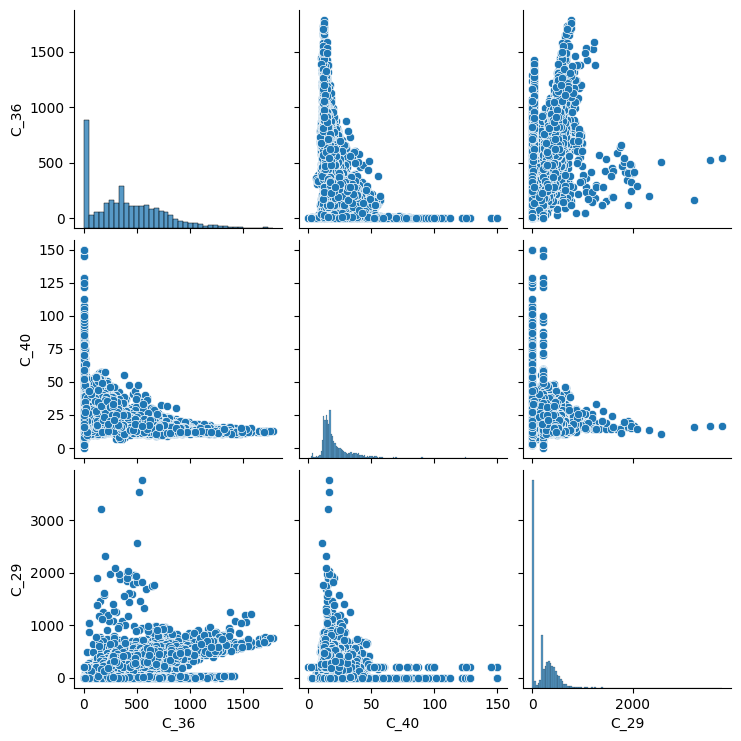

In [20]:
sns.pairplot(Xi[best])

In [21]:
# Identificamos los extremos de cada variable
Xi[best].describe(percentiles=[0.01,0.99]).T[['1%', '99%']].reset_index().values

array([['C_36', 1.0, 1322.0],
       ['C_40', 3.25, 70.0],
       ['C_29', 0.0, 857.0745]], dtype=object)

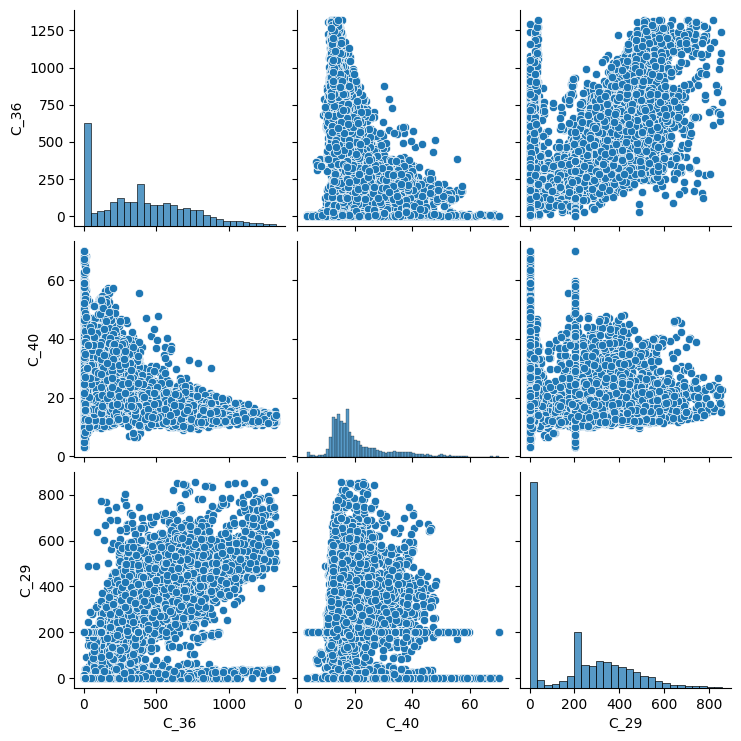

In [22]:
# Para cada varible, identificamos los valores que están fuera de los extremos y los marcamos con un 1
for v,li,ls in Xi[best].describe(percentiles=[0.01,0.99]).T[['1%', '99%']].reset_index().values:
    Xi[f'ex_{v}'] = ((Xi[v]<li)|(Xi[v]>ls)).astype(int)

# Creamos una nueva variable que nos indique si alguna de las variables tiene un valor extremo
Xi['ex_'] = Xi.filter(regex='^ex_').max(axis=1)
Xi['ex_'].value_counts(1)

# Eliminamos las variables que tienen valores extremos
Xi = Xi[Xi['ex_']==0].reset_index(drop=True)
Xi = Xi.drop(Xi.filter(regex='^ex_').columns, axis=1)
sns.pairplot(Xi[best])

In [24]:
# Tomamos una muestra para graficar en 3D
Xi.sample(200).iplot(kind='scatter3d',x=best[0],y=best[1],z=best[2],categories='TARGET')

### Aprendizaje

#### Híper-Parametrización

* Con la función MLPClassifier de sklearn se puede crear una red neuronal.

In [25]:
# Creamos el objeto para la red neuronal
mod = MLPClassifier()
# Indicamos los parametros que podemos probar
hp = {'hidden_layer_sizes':[(a,b,) for a in range(1,10) for b in range(1,10)],
'activation':['logistic','tanh','relu','identity'],
'solver':['lbfgs','sgd','adam'],
'learning_rate':['constant','invscaling','adaptive'],
'learning_rate_init':[0.001,0.01,0.1],
'max_iter':[1000]}
# Creamos las combinaciones de parametros
reduce(lambda x,y:x*y,[len(hp[k]) for k in hp])

8748

In [26]:
# Creamos el objeto para escalar las variables
sc = MinMaxScaler()
# Entrenamos
sc.fit(Xi[best])
# Transformamos las variables
Xs = pd.DataFrame(sc.transform(Xi[best]), columns=best)
Xs[um] = Xi[um]
Xs[vart] = Xi[vart]

* Con RandomizedSearchCV de sklearn se puede hacer una búsqueda aleatoria de los mejores híper-parámetros para la red neuronal.

In [27]:
rs = RandomizedSearchCV(param_distributions=hp,
estimator=mod,
n_iter=100,
scoring='roc_auc',
n_jobs=-1,cv=5,
verbose=1)
rs.fit(Xs[best], Xs[vart])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/guadalupe/analisis/EV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guadalupe/analisis/EV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guadalupe/analisis/EV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guadalupe/analisis/EV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu', 'identity'],
                                        'hidden_layer_sizes': [(1, 1), (1, 2),
                                                               (1, 3), (1, 4),
                                                               (1, 5), (1, 6),
                                                               (1, 7), (1, 8),
                                                               (1, 9), (2, 1),
                                                               (2, 2), (2, 3),
                                                               (2, 4), (2, 5),
                                                               (2, 6), (2, 7),
                                                               (2, 8), (2, 9),
                                                               (3, 1), (3, 2),
                                                               (3, 3), (3, 4),
                                                               (3, 5), (3, 6),
                                                               (3, 7), (3, 8),
                                                               (3, 9), (4, 1),
                                                               (4, 2), (4, 3), ...],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'max_iter': [1000],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   scoring='roc_auc', verbose=1)

### Entrenamiento

In [28]:
# Tomamos el mejor parametro
mod = rs.best_estimator_
# Entrenamos el modelo
mod.fit(Xs[best], Xs[vart])

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 5),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=1000,
              solver='lbfgs')

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

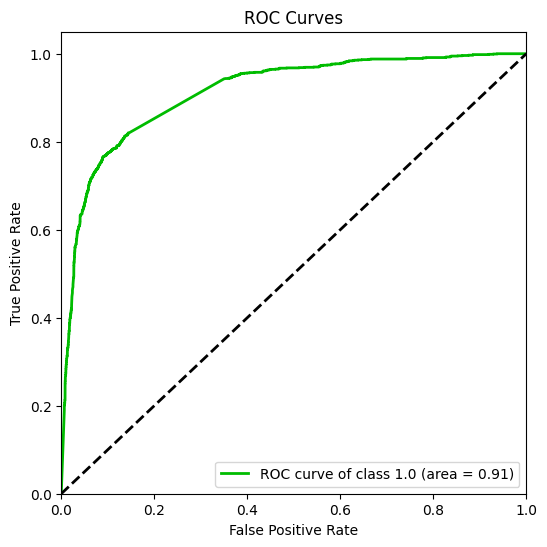

In [29]:
plot_roc(Xs[vart], mod.predict_proba(Xs[best]), plot_micro=False,
         plot_macro=False, classes_to_plot=[1], figsize=(6, 6))

### Validación del modelo

* Con make_pipeline de sklearn se puede crear un pipeline que permita hacer el preprocesamiento y el entrenamiento del modelo en una sola línea de código.

In [30]:
pipe = make_pipeline(im,sc,mod)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

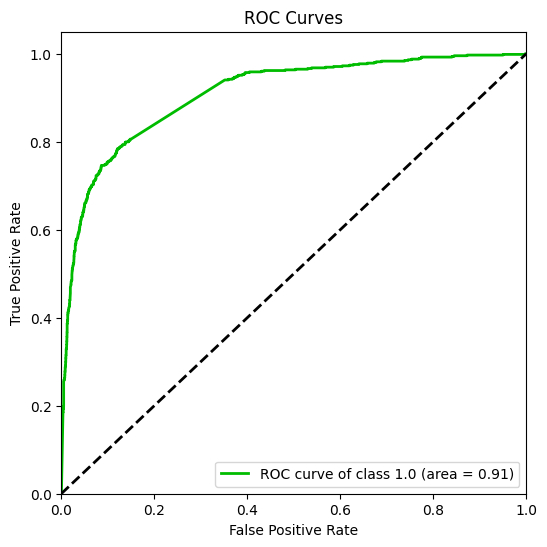

In [31]:
plot_roc(valid[vart], pipe.predict_proba(valid[best]),plot_micro=False,
         plot_macro=False, classes_to_plot=[1], figsize=(6, 6))

In [32]:
yt = pd.read_csv(os.path.join(ruta,'respuesta.csv'))
test = test.merge(yt, on=um, how='inner')

FileNotFoundError: [Errno 2] No such file or directory: '/home/guadalupe/analisis/Datos/pure_ml/respuesta.csv'

In [ ]:
plot_roc(test[vart], pipe.predict_proba(test[best]),plot_micro=False,
         plot_macro=False, classes_to_plot=[1], figsize=(6, 6))
